# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](https://iie.fing.edu.uy/~jlezama/DLVIS2020/entregables.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train Softmax on features
Using the multiclass Softmax code developed earlier in the assignment, train SoftMaxs on top of the features extracted above; this should achieve better results than training SoftMaxs directly on top of raw pixels.

In [5]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import Softmax

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_softmax = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the Softmax;     #
# save the best trained classifer in best_softmax. You might also want to play #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near [0.42] on the validation set.     #
################################################################################

# de la misma forma que en "softmax.ipynb":

grid_search = [[lr, rs] for lr in learning_rates for rs in regularization_strengths]

for learning_rate, regularization_strength in grid_search:
    
    softmax = Softmax()

    softmax.train(X_train_feats, y_train, learning_rate=learning_rate, 
                      reg=regularization_strength, num_iters=1500, verbose=True)
    
    y_train_pred = softmax.predict(X_train_feats)
    y_val_pred = softmax.predict(X_val_feats)
    
    train_accuracy = np.mean(y_train_pred == y_train)
    val_accuracy = np.mean(y_val_pred == y_val)

    results[(learning_rate, regularization_strength)] = \
                            (train_accuracy, val_accuracy)
    
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_softmax = softmax
        
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 149.550663
iteration 100 / 1500: loss 143.777450
iteration 200 / 1500: loss 138.229865
iteration 300 / 1500: loss 132.898242
iteration 400 / 1500: loss 127.778811
iteration 500 / 1500: loss 122.857539
iteration 600 / 1500: loss 118.128846
iteration 700 / 1500: loss 113.587832
iteration 800 / 1500: loss 109.222708
iteration 900 / 1500: loss 105.030953
iteration 1000 / 1500: loss 101.002793
iteration 1100 / 1500: loss 97.132525
iteration 1200 / 1500: loss 93.413940
iteration 1300 / 1500: loss 89.839614
iteration 1400 / 1500: loss 86.407772
iteration 0 / 1500: loss 1479.501900
iteration 100 / 1500: loss 992.101743
iteration 200 / 1500: loss 665.518770
iteration 300 / 1500: loss 446.691622
iteration 400 / 1500: loss 300.066022
iteration 500 / 1500: loss 201.820163
iteration 600 / 1500: loss 135.989265
iteration 700 / 1500: loss 91.879816
iteration 800 / 1500: loss 62.323744
iteration 900 / 1500: loss 42.520092
iteration 1000 / 1500: loss 29.250134
iteration 1100 / 

In [6]:
# Evaluate your trained Softmax on the test set
y_test_pred = best_softmax.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.416


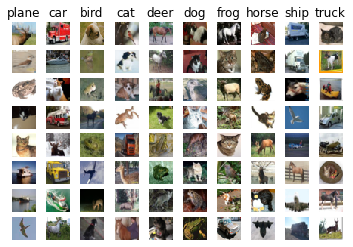

In [10]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense? 


$\color{blue}{\textit Your Answer:}$

Intentando darle un sentido a los errores de clasificacion me lleva a pensar en que al estar clasificando en funcion de texturas y colores, y no valores de pixeles,se observa que el clasificador determina como imagenes de aviones a imagenes con fondos uniformes (como la ultima de la columna en la que esta un ave con un fondo azul) ya que la mayoria de las fotos de aviones sacadas de dia tienen un fondo de un solo color. En cuanto a la textura proveniente de la caracteristica HoG, se observa que en su mayoria las imagenes mal clasificadas contienen figuras bien definidas sin demasiados detalles (como por eje las penúltima y la antepenúltima). Esto no se cumple para las imagenes del alce o del gato por ejemplo.



## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [11]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


In [20]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# tomando la solucion planteada en "two_layer_net.ipynb":

best_val = -1

# learning_rates= [1e-3, 1e-4] la red no aprende
learning_rates= [4e-1, 4e-1, 3e-1, 2e-1]
num_iters = [500, 1500, 2000]
# regs = [0.0, 0.1, 0.25, 0.40, 0.6] restringe mucho el clasificador
regs = [0.0, 0.001, 0.01]

grid_search = [[lr, ni, reg] for lr in learning_rates \
                                for ni in num_iters \
                                for reg in regs
                ]

for learning_rate, num_iters, reg in grid_search:
    
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=num_iters, batch_size=200,
            learning_rate=learning_rate, learning_rate_decay=0.95,
            reg=reg, verbose=False)

    val_acc = (net.predict(X_val_feats) == y_val).mean()
    
    print('learning_rate:', learning_rate,
          'num_iters:', num_iters, 'reg:', reg, 
          '----> Validation accuracy: ', val_acc)
    
    if val_acc > best_val:
        best_val = val_acc
        best_net = net

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


learning_rate: 0.4 num_iters: 500 reg: 0.0 ----> Validation accuracy:  0.523
learning_rate: 0.4 num_iters: 500 reg: 0.001 ----> Validation accuracy:  0.56
learning_rate: 0.4 num_iters: 500 reg: 0.01 ----> Validation accuracy:  0.502
learning_rate: 0.4 num_iters: 1500 reg: 0.0 ----> Validation accuracy:  0.589
learning_rate: 0.4 num_iters: 1500 reg: 0.001 ----> Validation accuracy:  0.592
learning_rate: 0.4 num_iters: 1500 reg: 0.01 ----> Validation accuracy:  0.535
learning_rate: 0.4 num_iters: 2000 reg: 0.0 ----> Validation accuracy:  0.576
learning_rate: 0.4 num_iters: 2000 reg: 0.001 ----> Validation accuracy:  0.582
learning_rate: 0.4 num_iters: 2000 reg: 0.01 ----> Validation accuracy:  0.519
learning_rate: 0.4 num_iters: 500 reg: 0.0 ----> Validation accuracy:  0.577
learning_rate: 0.4 num_iters: 500 reg: 0.001 ----> Validation accuracy:  0.573
learning_rate: 0.4 num_iters: 500 reg: 0.01 ----> Validation accuracy:  0.505
learning_rate: 0.4 num_iters: 1500 reg: 0.0 ----> Validatio

In [21]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.525
